In [1]:
# import 
import sys,os,glob
sys.path.append(os.path.abspath('CommonTools'))
import tifffile
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm_notebook as tqdm
import MaxViewer_py3 as mv
import pickle

In [56]:
### Load a single field of view and explore with the max_viewer

folder = r'D:\Data\bb_piezo_gelSample'
files = glob.glob(folder+r'\*.tif')
cols = ['750','647','561','405']
ims,ims_nms = [],[]
for fl in tqdm(files[4:]):
    im = tifffile.imread(fl)
    ncols = len(cols)
    for icol,col in enumerate(cols):
        ims.append(im[icol::ncols])
        tag = os.path.basename(fl)+'_'+col
        ims_nms.append(tag)

<ipython-input-56-4471e200977a>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for fl in tqdm(files[4:]):


In [38]:
%matplotlib notebook

In [61]:
ims_nms_,ims_=[],[]
for iim,nm in enumerate(ims_nms):
    if '750' in nm:
        ims_nms_.append(ims_nms[iim])
        ims_.append(ims[iim])

In [50]:
?mv.imshow_mark_3d

<IPython.core.display.Javascript object>


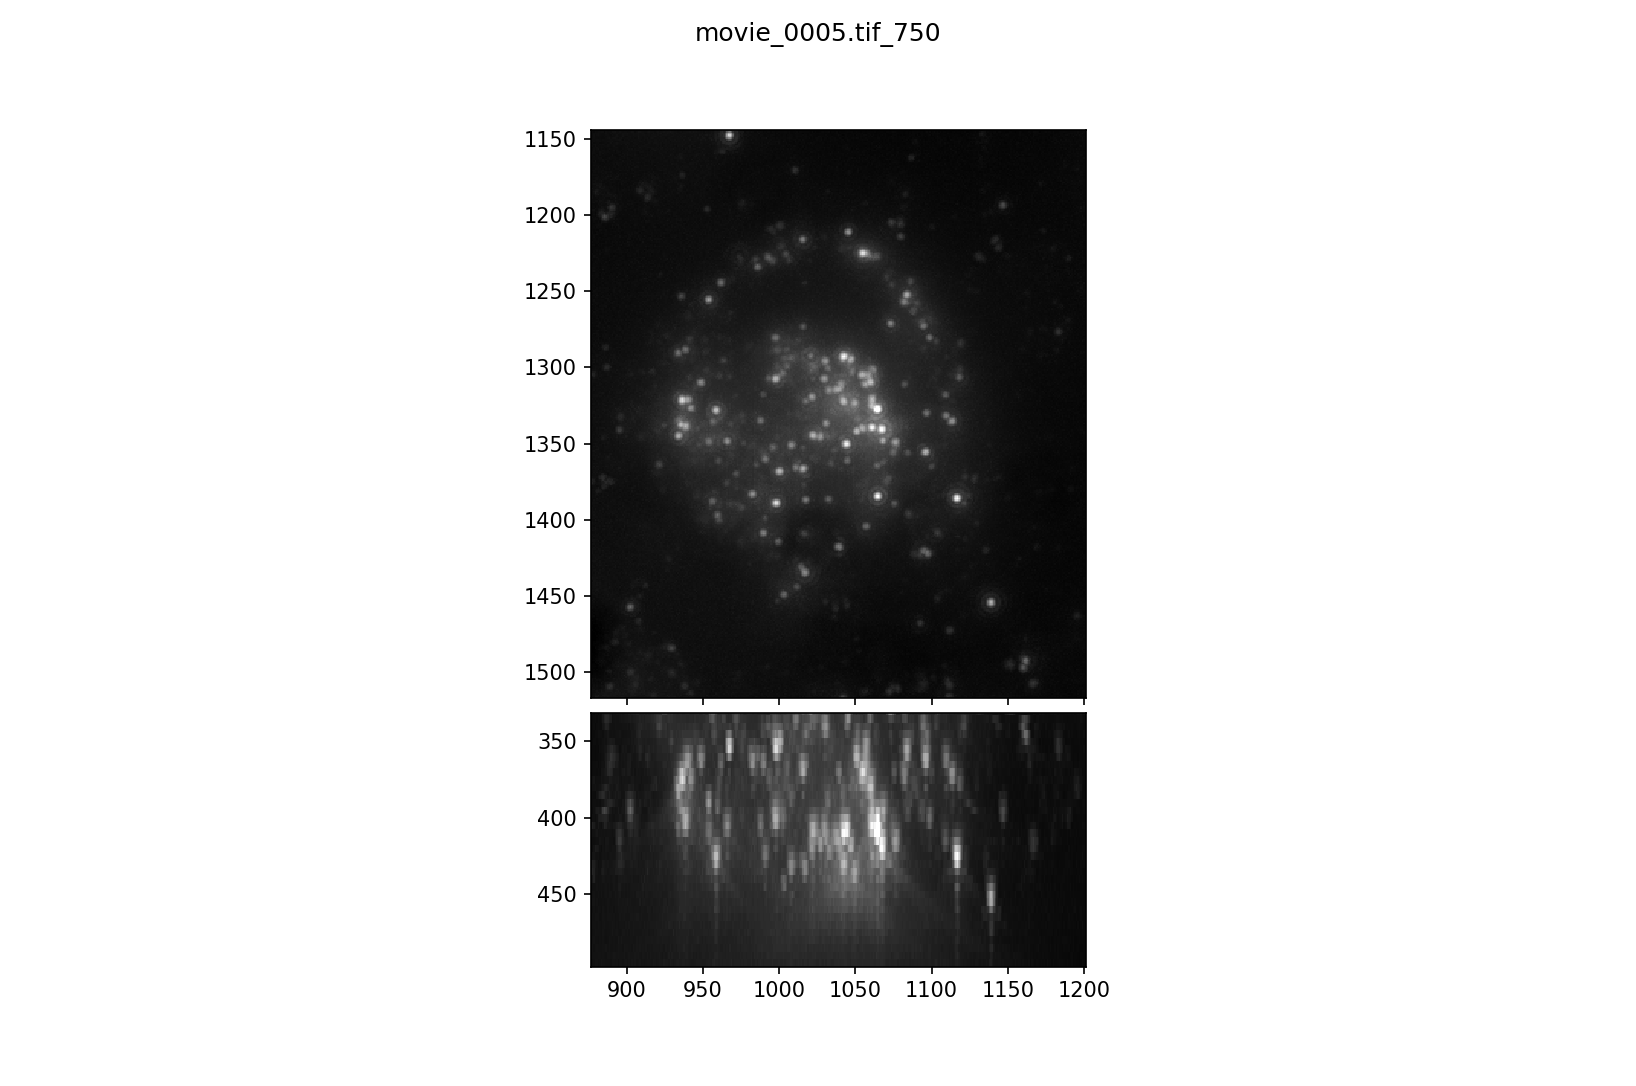

In [62]:
obj = mv.imshow_mark_3d(ims_,image_names=ims_nms_,rescz=0.2)

In [36]:
from scipy.spatial.distance import cdist
X1 = obj.pfits_save[2][:,1:4]
X2 = obj.pfits_save[3][:,1:4]
M = cdist(X1,X2)
dists_ = np.min(M,axis=0)
i1 = np.argmin(M,axis=0)
i2 = np.arange(len(X2))
keep = dists_<7
i1_ = i1[keep]
i2_ = i2[keep]
difs = X1[i1_]-X2[i2_]
difs -= np.mean(difs,axis=0)
difs

array([[ 0.10718136, -0.04268854,  0.19704466],
       [ 0.01496507,  0.06535848, -0.14039508],
       [-0.00537795, -0.24703412, -0.08231672],
       [ 0.00479379, -0.06739381,  0.19678205],
       [ 0.06101459,  0.05020332, -0.0780854 ],
       [-0.18257686,  0.24155467, -0.09302951]])

In [63]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 1AE5-E5D0

 Directory of C:\Users\MERFISH8\Scripts

11/06/2020  10:20 AM    <DIR>          .
11/06/2020  10:20 AM    <DIR>          ..
11/04/2020  10:28 AM    <DIR>          .ipynb_checkpoints
11/04/2020  10:51 AM         7,205,614 BB_WEA_RCA-5genes.ipynb
11/01/2020  04:16 PM    <DIR>          CommonTools
11/06/2020  10:20 AM           313,312 PI_check_speed.ipynb
09/24/2020  06:30 PM               555 Untitled.ipynb
               3 File(s)      7,519,481 bytes
               4 Dir(s)  7,872,857,382,912 bytes free
